<a href="https://colab.research.google.com/github/Gps-mai/Test/blob/main/Dota_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Сейчас мы будем анализировать каким персонажем я бы начал играть в Dota 2. Конечно это можно загуглить, но быстрее и интереснее попробовать разобраться самому. 

In [137]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Для начала нам нужны данные из https://www.opendota.com/
заходим в проводник и скачиваем csv файл.

In [182]:
pd.read_csv('/content/data.csv')

,match_id,start_time,win,hero_id,account_id,leaguename
0,6119478377,1628061521,False,53,100594231,LOOT.BET Pro Series 7
1,6119478377,1628061521,False,106,324277900,LOOT.BET Pro Series 7
2,6119478377,1628061521,False,49,162641196,LOOT.BET Pro Series 7
3,6119478377,1628061521,False,9,399862798,LOOT.BET Pro Series 7
4,6119478377,1628061521,False,58,148526973,LOOT.BET Pro Series 7
...,...,...,...,...,...,...
195,6120297187,1628101349,False,111,93817671,Dota 2 Champions League 2021-2022 Season
196,6120297187,1628101349,False,79,114596500,Dota 2 Champions League 2021-2022 Season
197,6120297187,1628101349,False,25,192981126,Dota 2 Champions League 2021-2022 Season
198,6120297187,1628101349,False,29,117514269,Dota 2 Champions League 2021-2022 Season


Не очень информативно, так я в доту не поиграю


Попробуем изменить стандартный запрос
```
SELECT
        
matches.match_id,
matches.start_time,
((player_matches.player_slot < 128) = matches.radiant_win) win,
player_matches.hero_id,
player_matches.account_id,
leagues.name leaguename
FROM matches
JOIN match_patch using(match_id)
JOIN leagues using(leagueid)
JOIN player_matches using(match_id)
JOIN heroes on heroes.id = player_matches.hero_id
LEFT JOIN notable_players ON notable_players.account_id = player_matches.account_id
LEFT JOIN teams using(team_id)
WHERE TRUE
AND matches.start_time >= extract(epoch from timestamp '2021-08-04T11:55:27.136Z')
ORDER BY matches.match_id NULLS LAST
LIMIT 200 # Было
```



И так мне удалось убрать лимиты, изменить дату на начало года (меня интересует только свежая информация) и найти данные о именах персонажей (heroes.name)
        

```
SELECT
matches.match_id,
matches.start_time,
((player_matches.player_slot < 128) = matches.radiant_win) win,
player_matches.hero_id,
player_matches.account_id,
leagues.name leaguename,
heroes.name
FROM matches
JOIN match_patch using(match_id)
JOIN leagues using(leagueid)
JOIN player_matches using(match_id)
JOIN heroes on heroes.id = player_matches.hero_id
LEFT JOIN notable_players ON notable_players.account_id = player_matches.account_id
LEFT JOIN teams using(team_id)
WHERE TRUE
AND matches.start_time >= extract(epoch from timestamp '2021-01-01T07:17:45.523Z')
ORDER BY matches.match_id NULLS LAST # Стало
```




In [183]:
dota_frame=pd.read_csv('/content/data (5).csv')

In [184]:
dota_frame

,match_id,start_time,win,hero_id,account_id,leaguename,name
0,5766868635,1609488182,False,27,164530809,WCAA冬季电子竞技挑战赛,npc_dota_hero_shadow_shaman
1,5766868635,1609488182,False,87,222189151,WCAA冬季电子竞技挑战赛,npc_dota_hero_disruptor
2,5766868635,1609488182,False,8,254710104,WCAA冬季电子竞技挑战赛,npc_dota_hero_juggernaut
3,5766868635,1609488182,True,29,99983413,WCAA冬季电子竞技挑战赛,npc_dota_hero_tidehunter
4,5766868635,1609488182,True,6,110837826,WCAA冬季电子竞技挑战赛,npc_dota_hero_drow_ranger
...,...,...,...,...,...,...,...
103735,6164104728,1630652820,False,75,293904640,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_silencer
103736,6164104728,1630652820,True,7,119576842,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_earthshaker
103737,6164104728,1630652820,False,87,931145002,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_disruptor
103738,6164104728,1630652820,True,18,116585378,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_sven


Переведем дату в привычный для меня формат, создав колонку date и проверим все ли получилось!

In [190]:
dota_frame['date']=pd.to_datetime(dota_frame.start_time, unit='s')

In [191]:
dota_frame

,match_id,start_time,win,hero_id,account_id,leaguename,name,date
0,5766868635,1609488182,False,27,164530809,WCAA冬季电子竞技挑战赛,npc_dota_hero_shadow_shaman,2021-01-01 08:03:02
1,5766868635,1609488182,False,87,222189151,WCAA冬季电子竞技挑战赛,npc_dota_hero_disruptor,2021-01-01 08:03:02
2,5766868635,1609488182,False,8,254710104,WCAA冬季电子竞技挑战赛,npc_dota_hero_juggernaut,2021-01-01 08:03:02
3,5766868635,1609488182,True,29,99983413,WCAA冬季电子竞技挑战赛,npc_dota_hero_tidehunter,2021-01-01 08:03:02
4,5766868635,1609488182,True,6,110837826,WCAA冬季电子竞技挑战赛,npc_dota_hero_drow_ranger,2021-01-01 08:03:02
...,...,...,...,...,...,...,...,...
103735,6164104728,1630652820,False,75,293904640,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_silencer,2021-09-03 07:07:00
103736,6164104728,1630652820,True,7,119576842,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_earthshaker,2021-09-03 07:07:00
103737,6164104728,1630652820,False,87,931145002,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_disruptor,2021-09-03 07:07:00
103738,6164104728,1630652820,True,18,116585378,QH Series Season 2 - Hosted by Oceanic Esports,npc_dota_hero_sven,2021-09-03 07:07:00


Отлично! Теперь для удобства уберем лишнюю, для меня, информацию.

In [192]:
data_frame=dota_frame.drop(['start_time', 'hero_id', 'leaguename'], axis=1)

In [193]:
data_frame

,match_id,win,account_id,name,date
0,5766868635,False,164530809,npc_dota_hero_shadow_shaman,2021-01-01 08:03:02
1,5766868635,False,222189151,npc_dota_hero_disruptor,2021-01-01 08:03:02
2,5766868635,False,254710104,npc_dota_hero_juggernaut,2021-01-01 08:03:02
3,5766868635,True,99983413,npc_dota_hero_tidehunter,2021-01-01 08:03:02
4,5766868635,True,110837826,npc_dota_hero_drow_ranger,2021-01-01 08:03:02
...,...,...,...,...,...
103735,6164104728,False,293904640,npc_dota_hero_silencer,2021-09-03 07:07:00
103736,6164104728,True,119576842,npc_dota_hero_earthshaker,2021-09-03 07:07:00
103737,6164104728,False,931145002,npc_dota_hero_disruptor,2021-09-03 07:07:00
103738,6164104728,True,116585378,npc_dota_hero_sven,2021-09-03 07:07:00


Теперь посчитаем сколько раз каждый персонаж сыграл в этом году! 

In [195]:
name_count=data_frame.groupby('name', as_index=False) \
.agg({'win':'count'}) \
.sort_values('win', ascending = False) \
.rename(columns = {'win' : 'all_match'})
name_count

,name,all_match
56,npc_dota_hero_mars,3082
51,npc_dota_hero_lion,2762
75,npc_dota_hero_puck,2589
37,npc_dota_hero_grimstroke,2449
113,npc_dota_hero_void_spirit,2060
...,...,...
23,npc_dota_hero_dazzle,109
52,npc_dota_hero_lone_druid,92
93,npc_dota_hero_sniper,87
58,npc_dota_hero_meepo,57


Вот он топ 10 самых популярных персонажей!

In [197]:
name_count.head(10)

,name,all_match
56,npc_dota_hero_mars,3082
51,npc_dota_hero_lion,2762
75,npc_dota_hero_puck,2589
37,npc_dota_hero_grimstroke,2449
113,npc_dota_hero_void_spirit,2060
66,npc_dota_hero_nyx_assassin,2044
74,npc_dota_hero_phoenix,1914
29,npc_dota_hero_earth_spirit,1807
106,npc_dota_hero_tusk,1776
59,npc_dota_hero_mirana,1730


Можно было бы остановиться на этом шаге и выбрать одного из популярных персонажей, но лучше давайте узнаем какие персонажи чаще одерживают победу. 

In [199]:
win_count=data_frame.groupby('name', as_index=False) \
.agg({'win':'sum'}) \
.sort_values('win', ascending = False)
win_count

,name,win
56,npc_dota_hero_mars,1487
75,npc_dota_hero_puck,1364
51,npc_dota_hero_lion,1334
37,npc_dota_hero_grimstroke,1162
66,npc_dota_hero_nyx_assassin,1155
...,...,...
52,npc_dota_hero_lone_druid,49
23,npc_dota_hero_dazzle,38
93,npc_dota_hero_sniper,31
58,npc_dota_hero_meepo,31


Теперь узнаем чья интенсивность побед в% самая высокая. 
Для начала соединим наши DF. 

In [200]:
win_count=win_count.merge(name_count)
win_count

,name,win,all_match
0,npc_dota_hero_mars,1487,3082
1,npc_dota_hero_puck,1364,2589
2,npc_dota_hero_lion,1334,2762
3,npc_dota_hero_grimstroke,1162,2449
4,npc_dota_hero_nyx_assassin,1155,2044
...,...,...,...
116,npc_dota_hero_lone_druid,49,92
117,npc_dota_hero_dazzle,38,109
118,npc_dota_hero_sniper,31,87
119,npc_dota_hero_meepo,31,57


Тут можно заметить странность. Персонаж "dawnbreaker" за год играл только 2 раза и всегда побеждал. Попробуем вывести информацию о нем.	

In [109]:
dota_frame[dota_frame.name=='npc_dota_hero_dawnbreaker']

,match_id,start_time,win,hero_id,account_id,leaguename,name,date
63478,6005534918,1621674558,True,135,185438531,Moon Studio Asia,npc_dota_hero_dawnbreaker,2021-05-22 09:09:18
98319,6140624419,1629278471,True,135,1227192897,Ultras Dota Pro League,npc_dota_hero_dawnbreaker,2021-08-18 09:21:11


Ничего странного тут нет, нужно будет спросить у знакомыз экспертов почему все не играют "dawnbreaker". Создадим колонку с процентом побед!

In [202]:
win_count['percentage_of_wins']=(win_count.win / win_count.all_match) * 100

In [203]:
win_count=win_count.sort_values('percentage_of_wins', ascending=False)
win_count

,name,win,all_match,percentage_of_wins
120,npc_dota_hero_dawnbreaker,2,2,100.000000
108,npc_dota_hero_chen,81,139,58.273381
31,npc_dota_hero_beastmaster,618,1077,57.381616
73,npc_dota_hero_broodmother,279,488,57.172131
4,npc_dota_hero_nyx_assassin,1155,2044,56.506849
...,...,...,...,...
88,npc_dota_hero_abyssal_underlord,215,551,39.019964
111,npc_dota_hero_zuus,75,194,38.659794
113,npc_dota_hero_silencer,67,179,37.430168
118,npc_dota_hero_sniper,31,87,35.632184


Выведем топ 10 победителей и "dawnbreaker"!

In [205]:
win_count.head(11)

,name,win,all_match,percentage_of_wins
120,npc_dota_hero_dawnbreaker,2,2,100.000000
108,npc_dota_hero_chen,81,139,58.273381
31,npc_dota_hero_beastmaster,618,1077,57.381616
73,npc_dota_hero_broodmother,279,488,57.172131
4,npc_dota_hero_nyx_assassin,1155,2044,56.506849
48,npc_dota_hero_dark_seer,477,850,56.117647
42,npc_dota_hero_keeper_of_the_light,532,956,55.648536
26,npc_dota_hero_templar_assassin,649,1170,55.470085
67,npc_dota_hero_wisp,306,554,55.234657
46,npc_dota_hero_elder_titan,491,889,55.230596


Для удобства можно его пока не учитывать)

In [207]:
win_count_2=win_count.query('name != "npc_dota_hero_dawnbreaker"').head(10)
win_count_2

,name,win,all_match,percentage_of_wins
108,npc_dota_hero_chen,81,139,58.273381
31,npc_dota_hero_beastmaster,618,1077,57.381616
73,npc_dota_hero_broodmother,279,488,57.172131
4,npc_dota_hero_nyx_assassin,1155,2044,56.506849
48,npc_dota_hero_dark_seer,477,850,56.117647
42,npc_dota_hero_keeper_of_the_light,532,956,55.648536
26,npc_dota_hero_templar_assassin,649,1170,55.470085
67,npc_dota_hero_wisp,306,554,55.234657
46,npc_dota_hero_elder_titan,491,889,55.230596
101,npc_dota_hero_bane,119,217,54.838710


Собственно строим график, выводим самых лучших игроков, выбираем и начинаем играть!

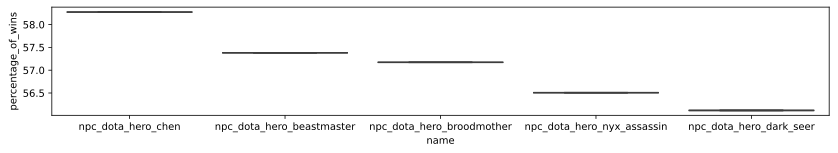

In [208]:
plt.figure(figsize=(14,2))
sns.boxplot(x="name", y="percentage_of_wins", data=win_count_2.head())

Анализ показал, что изучать данные о Dota 2 увлекатекльнее и полезнее чем играть в Dota 2 =)